#  Analytics Experience - Group Project - MSCI:6040

### Data Visualization and Model Scoring examples

By Group 2 (Chris Wagner, Palden Williams, Tarun Mandava  - Data Scientists) 
- September, 2020                                                             


In [1]:
# Dependencies and the libraries to import

import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sn
import matplotlib.pyplot as plt                     
import numpy as np           
import plotly.offline as plyo
#import cufflinks as cf
#plyo.init_notebook_mode()



In [2]:
#  Further library imports

import random
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata
from collections import defaultdict
import string

from nltk.corpus import stopwords
from sklearn.metrics import log_loss
from tqdm import tqdm
stopwords = stopwords.words('english')
sn.set_context('notebook')

In [3]:
# Importing Kaggler data set

sample_submission_data = pd.read_csv("Data/OriginalData/sample_submission.csv")
test_data = pd.read_csv("Data/OriginalData/test.csv")
train_data = pd.read_csv("Data/OriginalData/train.csv")


### Word visualizations

#### Wordcloud logic

In [4]:
#Code sourced from : https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc

#import the wordcloud package
from wordcloud import WordCloud, STOPWORDS

#Define the word cloud function with a max of 200 words
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    #define additional stop words that are not contained in the dictionary
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)
    #Generate the word cloud
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    #set the plot parameters
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 

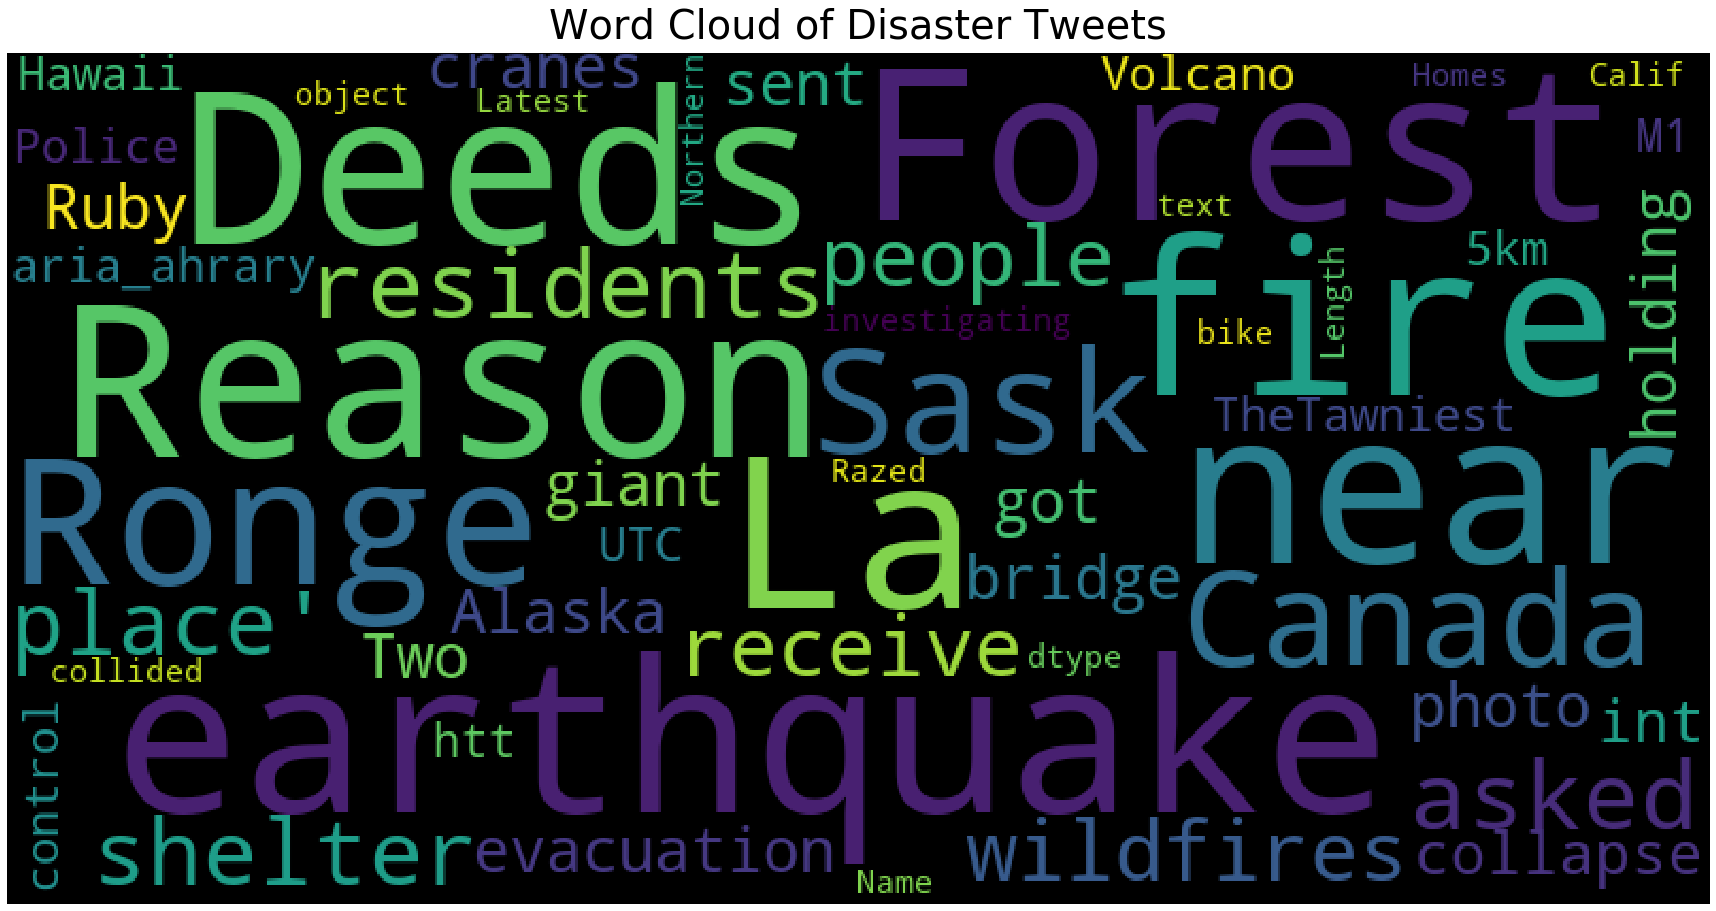

In [5]:
#Select disaster tweets from training dataset
disaster = train_data.loc[train_data['target'] == 1]
#run the function on the insincere questions
plot_wordcloud(disaster["text"], title="Word Cloud of Disaster Tweets")

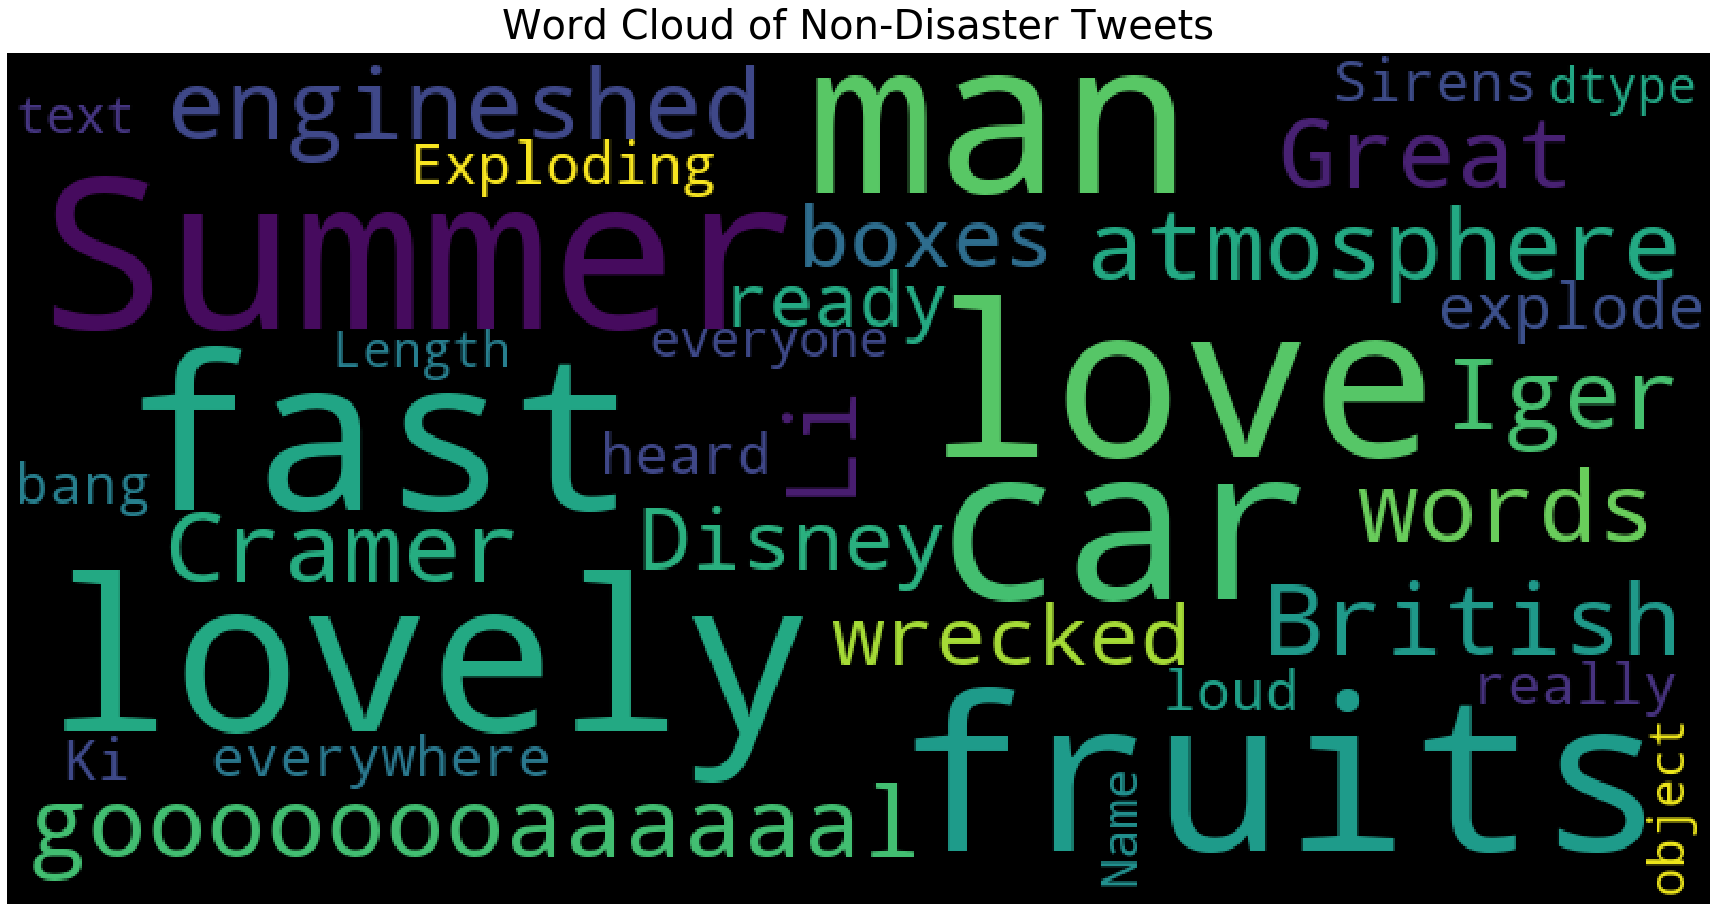

In [6]:
#Select disaster tweets from training dataset
nondisaster = train_data.loc[train_data['target'] == 0]
#run the function on the insincere questions
plot_wordcloud(nondisaster["text"], title="Word Cloud of Non-Disaster Tweets")

In [7]:
def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, col, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df[col]:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"] 
    return temp_df 

#Function to construct side by side comparison plots
def comparison_plot(df_1,df_2,col_1,col_2, space):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    
    sns.barplot(x=col_2, y=col_1, data=df_1, ax=ax[0], color="royalblue")
    sns.barplot(x=col_2, y=col_1, data=df_2, ax=ax[1], color="royalblue")

    ax[0].set_xlabel('Word count', size=14)
    ax[0].set_ylabel('Words', size=14)
    ax[0].set_title('Top words in non-disaster tweets', size=18)

    ax[1].set_xlabel('Word count', size=14)
    ax[1].set_ylabel('Words', size=14)
    ax[1].set_title('Top words in disaster tweets', size=18)

    fig.subplots_adjust(wspace=space)
    
    plt.show()

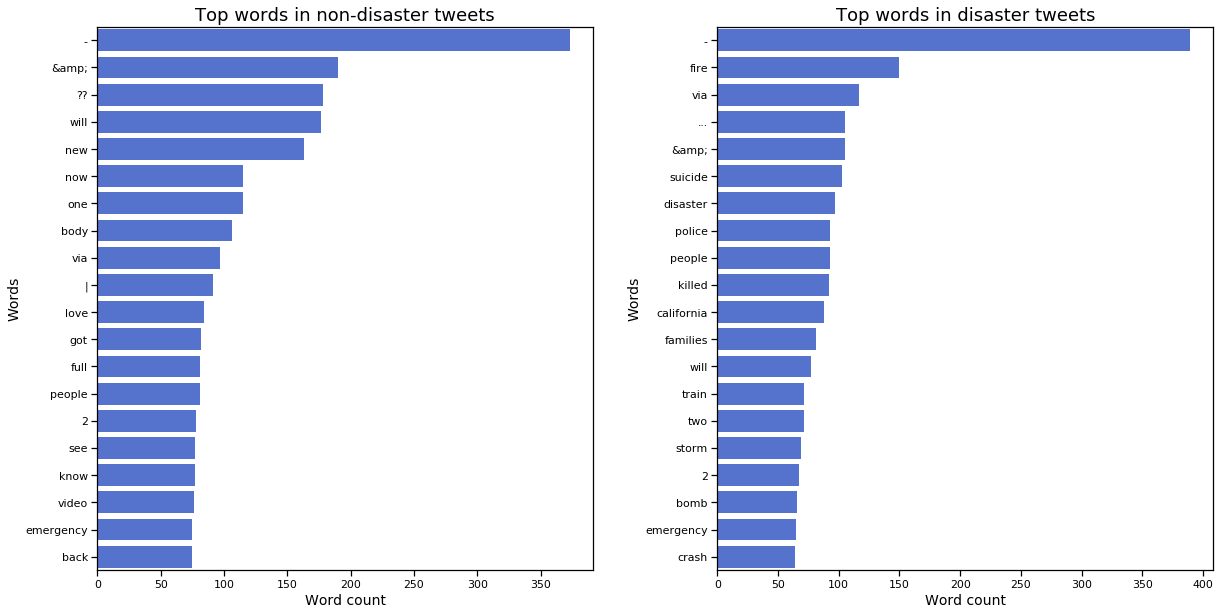

In [8]:
import seaborn as sns
sincere_1gram = generate_ngrams(train_data[train_data["target"]==0], 'text', 1, 20)
insincere_1gram = generate_ngrams(train_data[train_data["target"]==1], 'text', 1, 20)
#compare the bar plots
comparison_plot(sincere_1gram,insincere_1gram,'word','wordcount', 0.25)

C:\Users\chris\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 137 missing from current font.

C:\Users\chris\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 137 missing from current font.



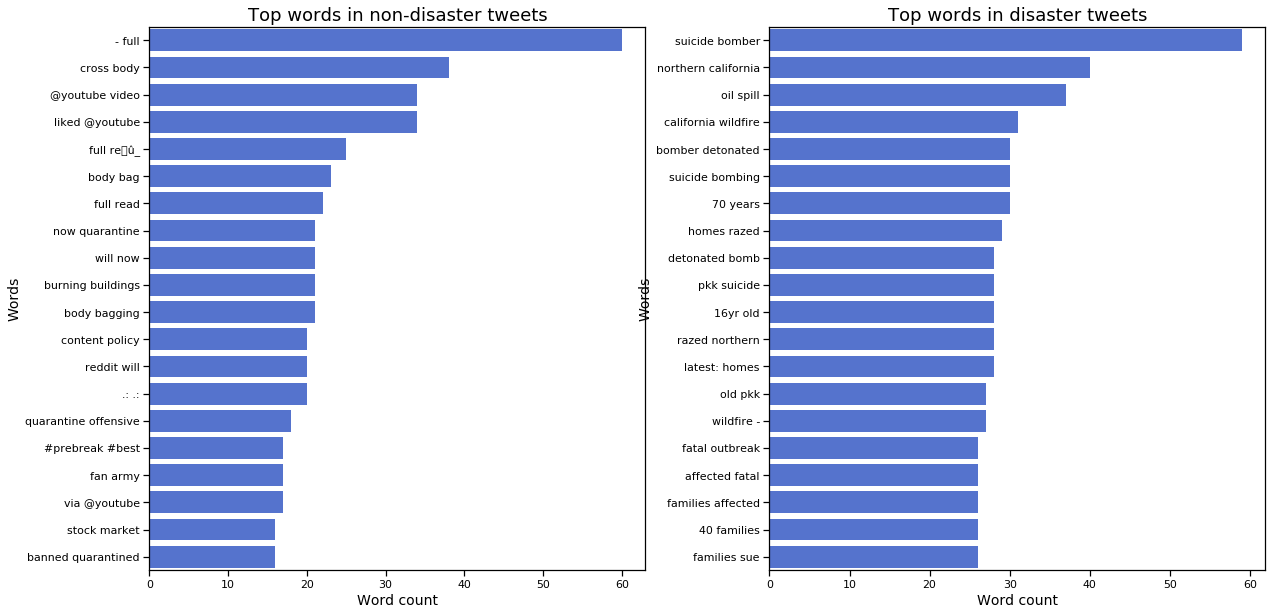

In [9]:
#Obtain sincere and insincere ngram based on 2 gram (top 20)
sincere_2gram = generate_ngrams(train_data[train_data["target"]==0], 'text', 2, 20)
insincere_2gram = generate_ngrams(train_data[train_data["target"]==1], 'text', 2, 20)
#compare the bar plots
comparison_plot(sincere_2gram,insincere_2gram,'word','wordcount', 0.25)

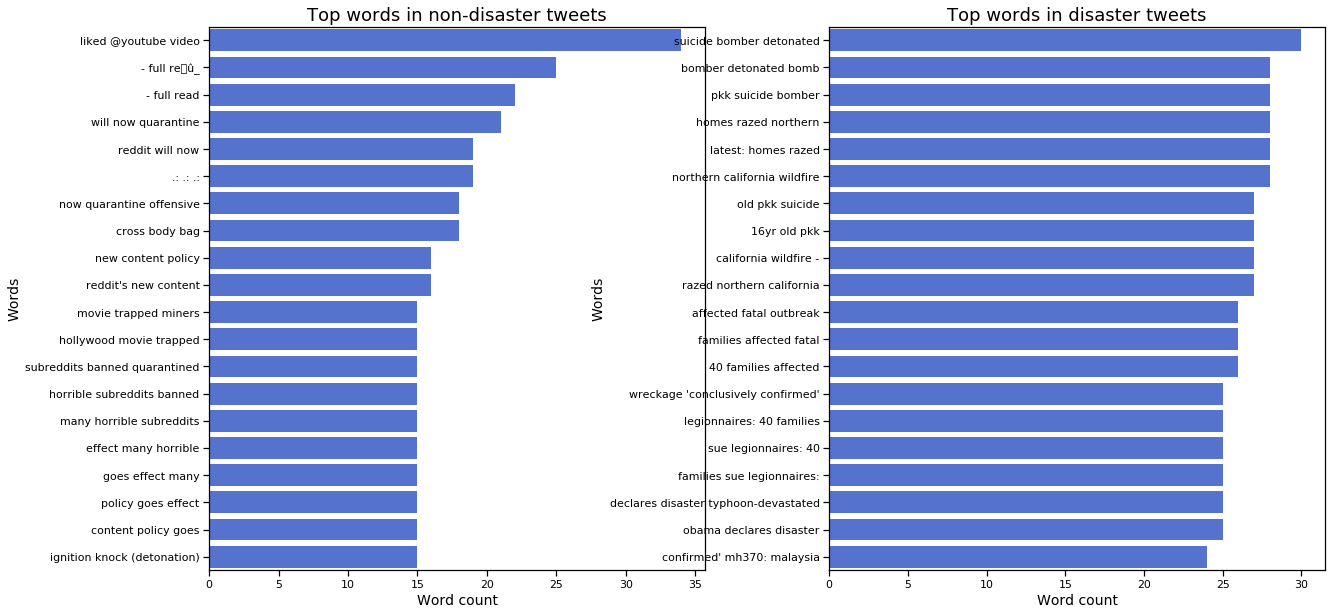

In [10]:
#Obtain sincere and insincere ngram based on 3 gram (top 20)
sincere_3gram = generate_ngrams(train_data[train_data["target"]==0], 'text', 3, 20)
insincere_3gram = generate_ngrams(train_data[train_data["target"]==1], 'text', 3, 20)
#compare the bar plots
comparison_plot(sincere_3gram,insincere_3gram,'word','wordcount', 0.25)

# Locations 

In [11]:
#Check number of unique keywords and locations
print (train_data.location.nunique(), test_data.location.nunique())

3341 1602


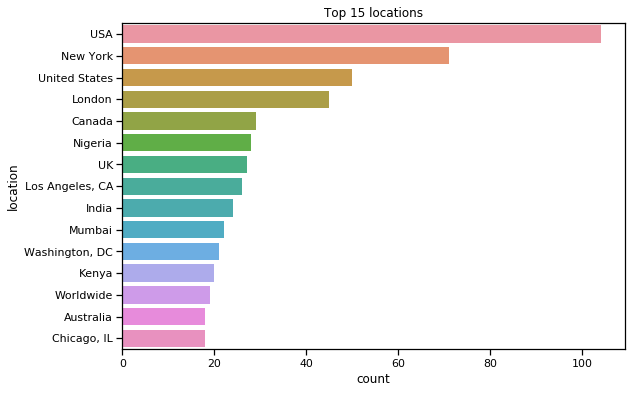

In [12]:
# Most common locations
plt.figure(figsize=(9,6))
sns.countplot(y=train_data.location, order = train_data.location.value_counts().iloc[:15].index)
plt.title('Top 15 locations')
plt.show()

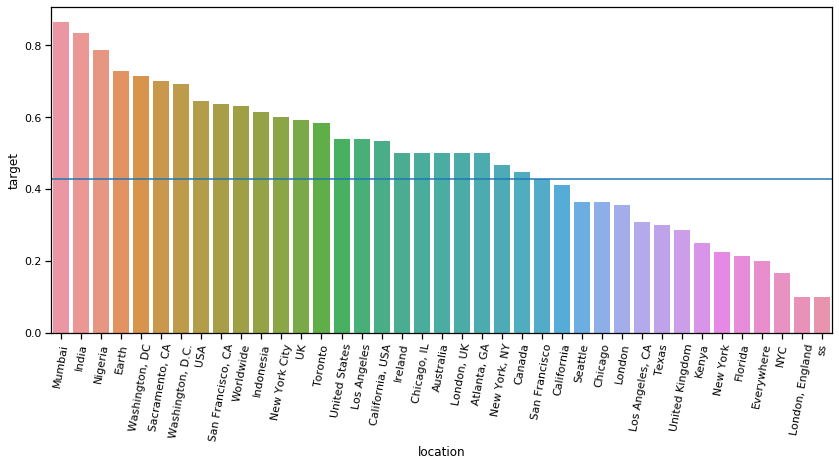

In [13]:
raw_loc = train_data.location.value_counts()
top_loc = list(raw_loc[raw_loc>=10].index)
top_only = train_data[train_data.location.isin(top_loc)]

top_l = top_only.groupby('location').mean()['target'].sort_values(ascending=False)
plt.figure(figsize=(14,6))
sns.barplot(x=top_l.index, y=top_l)
plt.axhline(np.mean(train_data.target))
plt.xticks(rotation=80)
plt.show()

## Model Evaluation

#### Creating a function that cross validates and picks the best model based on score

In [14]:
x = train_data["text"]
y = train_data["target"]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split = train_test_split(x,y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)

(6090,)
(1523,)


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
def dummy(doc):
    return doc

tfidf = TfidfVectorizer(
         tokenizer=dummy,
         preprocessor=dummy,
         min_df = 0.000167

)

x_train = tfidf.fit_transform(x_train)

x_test =  tfidf.transform(x_test)

In [17]:
#pip install xgboost
#pip install scikit-optimize
import xgboost as xgb
from sklearn.ensemble import forest 
from sklearn import tree
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import cross_val_score
import statistics as stats
from sklearn.feature_extraction.text import TfidfVectorizer
from skopt import BayesSearchCV

xg = xgb.XGBClassifier()
fo =  forest.RandomForestClassifier()
tr = tree.DecisionTreeClassifier()
lo = linear_model.LogisticRegression()
sv = svm.SVC()

xgb_score = cross_val_score(xg,x_train,y_train,cv=5)
ran_score = cross_val_score(fo,x_train,y_train,cv=5)
dtree_score = cross_val_score(tr,x_train,y_train,cv=5)
log_score = cross_val_score(lo,x_train,y_train,cv=5)
svm_score = cross_val_score(sv,x_train,y_train,cv=5)

# This Dataframe outputs the average score for each algorithms
df_score = pd.DataFrame({"model":["xgboost","RandomForestClassifier","DecisionTreeClassifier","LogisticRegression","Support vector machine"],"score":[stats.mean(xgb_score),stats.mean(ran_score),stats.mean(dtree_score),stats.mean(log_score),stats.mean(svm_score)]})
df_score
# We can see that svm is the best scoring model

C:\Users\chris\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.



,model,score
0,xgboost,0.694910
1,RandomForestClassifier,0.715435
2,DecisionTreeClassifier,0.613793
3,LogisticRegression,0.691133
4,Support vector machine,0.712151


# Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, fbeta_score, classification_report

'''Function to print model accuracy information'''

def printAccuracyInfo(model, x_test, y_test):
    print(y_test.value_counts())
    # Make predictions against the test set
    pred = model.predict(x_test)

    # Show the confusion matrix
    print("confusion matrix:")
    print(confusion_matrix(y_test, pred))

    # Find the accuracy scores of the predictions against the true classes
    print("accuracy: %0.3f" % accuracy_score(y_test, pred))
    print("recall: %0.3f" % recall_score(y_test, pred, pos_label=True))
    print("precision: %0.3f" % precision_score(y_test, pred, pos_label=True))
    print("f-measure: %0.3f" % fbeta_score(y_test, pred, beta=1, pos_label=True))
    print(classification_report(y_test,pred))

In [19]:
# example use of printAccuracyInfo using gbc_model and X_test
# note: if you trained model using rfecv_selected_train, you need to call the function with rfecv_selected_test for X_test
sv.fit(x_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
printAccuracyInfo(sv, x_test, y_test)

0    886
1    637
Name: target, dtype: int64
confusion matrix:
[[720 166]
 [277 360]]
accuracy: 0.709
recall: 0.565
precision: 0.684
f-measure: 0.619
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       886
           1       0.68      0.57      0.62       637

    accuracy                           0.71      1523
   macro avg       0.70      0.69      0.69      1523
weighted avg       0.71      0.71      0.70      1523



In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

'''Function to print confusion matrix for a model
   You may need to run this to update to scikit-learn version 0.22.1
         !pip install -U scikit-learn --user
'''

def plotConfusionMatrix (negative_label, positive_label, model, x_test, y_test):
    titles_options = [("Confusion matrix, without normalization", None,'d'),
                      ("Normalized confusion matrix", 'true','.3g')]
    for title, normalize,val_frmt in titles_options:
        disp = plot_confusion_matrix(model, x_test, y_test,
                                     display_labels=[negative_label,positive_label],
                                     cmap=plt.cm.Blues,
                                     values_format=val_frmt,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        disp.ax_.set_xlabel('Predicted')
        disp.ax_.set_ylabel('Actual')

        print(title)
        print(disp.confusion_matrix)

    plt.show()

In [23]:
x_test

<1523x112 sparse matrix of type '<class 'numpy.float64'>'
	with 47997 stored elements in Compressed Sparse Row format>

Confusion matrix, without normalization
[[720 166]
 [277 360]]
Normalized confusion matrix
[[0.81264108 0.18735892]
 [0.43485086 0.56514914]]


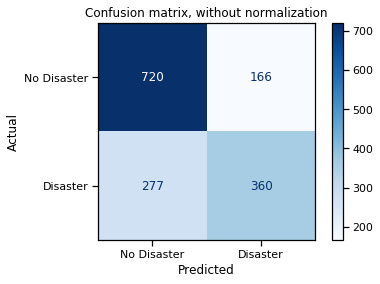

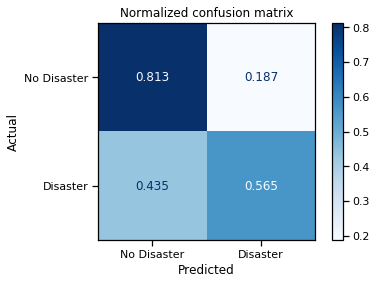

In [22]:
# example use of plotConfusionMatrix using gbc_model and X_test
# note: if you trained model using rfecv_selected_train, you need to call the function with rfecv_selected_test for X_test
plotConfusionMatrix('No Disaster', 'Disaster', sv, x_test, y_test)